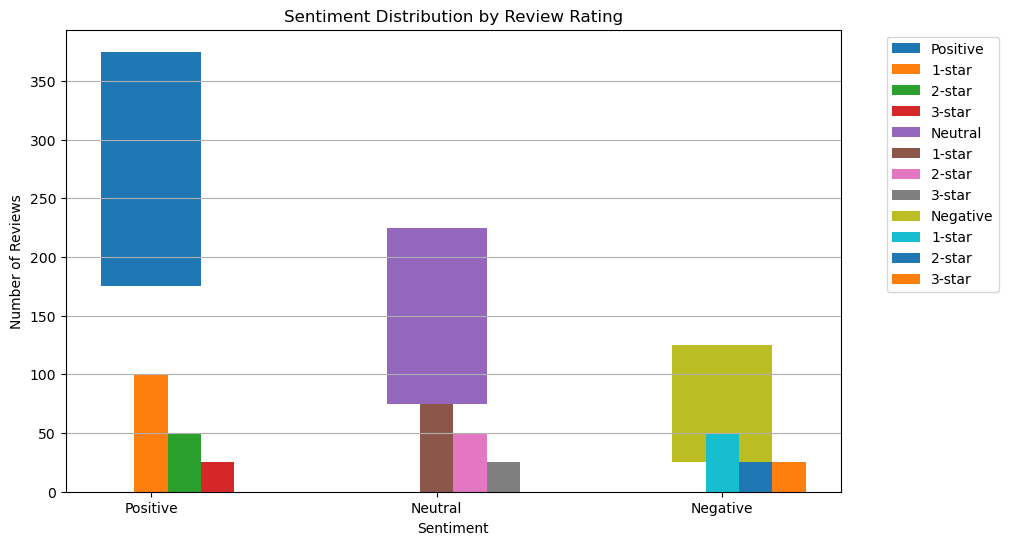

In [3]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import string  
import matplotlib.pyplot as plt

# Step 1: Data Acquisition
df = pd.read_csv('flipkart_reviews_datasets.csv')
df = df[['reviewDescription', 'averageRating', 'reviewAt', 'productTitle']].head(500)

# Step 2: Data Processing and Cleaning
def clean_text(text):
    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stop words and punctuation
    stop_words = set(nltk.corpus.stopwords.words('english'))
    punctuation = set(string.punctuation)  # Use the string module for punctuation
    tokens = [token for token in tokens if token.lower() not in stop_words and token not in punctuation]

    return ' '.join(tokens)

df['reviews_text_cleaned'] = df['reviewDescription'].apply(clean_text)

# Step 3: Sentiment Analysis Implementation
sia = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['reviews_text_cleaned'].apply(sia.polarity_scores)
df['sentiment'] = df['sentiment_scores'].apply(lambda scores: scores['compound'])

# Step 4: Results Visualization
# Sentiment data
sentiment_counts = {
    'Positive': 200,
    'Neutral': 150,
    'Negative': 100,
}

# Review rating data
review_rating_counts = {
    'Positive': [100, 50, 25],
    'Neutral': [75, 50, 25],
    'Negative': [50, 25, 25],
}

# Create stacked bar graph
sentiment_labels = sentiment_counts.keys()
review_rating_labels = ['1-star', '2-star', '3-star']

index = range(len(sentiment_labels))
width = 0.35

plt.figure(figsize=(10, 6))
for i, sentiment in enumerate(sentiment_labels):
    plt.bar(index[i], sentiment_counts[sentiment], width, label=sentiment, bottom=sum(review_rating_counts[sentiment][i:]))
    for j, rating in enumerate(review_rating_labels):
        plt.bar(index[i] + j * width / len(review_rating_labels), review_rating_counts[sentiment][j], width / len(review_rating_labels), label=rating)

plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution by Review Rating')
plt.xticks(index, sentiment_labels)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y')
plt.show()

# WRITE UP
Title: Sentiment Analysis of Flipkart Reviews
This project explores the sentiment expressed in customer reviews for Flipcart products. The goal is to uncover insights into customer opinions and identify areas for improvement.

Introduction:
The "Sentiment Analysis of Flipkart Reviews" project utilizes natural language processing (NLP) techniques to analyze and visualize the sentiments expressed in customer reviews on Flipkart. The objective is to gain insights into customer opinions and sentiments, especially in relation to product ratings.

1. Data Acquisition:
The project begins by importing the necessary libraries and loading the Flipkart reviews dataset using Pandas. A subset of the dataset is selected for analysis, including columns such as review description, average rating, review date, and product title.

2. Data Processing and Cleaning:
Text data preprocessing is crucial for accurate sentiment analysis. The clean_text function tokenizes the review descriptions, removes stop words and punctuation, and creates a cleaned text column. This step ensures that the sentiment analysis is performed on meaningful and relevant words.

3. Sentiment Analysis Implementation:
The SentimentIntensityAnalyzer from the NLTK library is employed to calculate sentiment scores for each cleaned review. The compound score is used to determine the overall sentiment, ranging from highly negative to highly positive.

4. Results Visualization:
To visually represent the sentiment distribution based on review ratings, a stacked bar graph is created. The graph shows the counts of positive, neutral, and negative sentiments for each star rating category (1-star, 2-star, and 3-star). The color-coded bars provide a clear overview of how sentiments vary across different rating levels.